# Parcial 3.


In [ ]:
from pylab import *
import matplotlib.pyplot as plt

import random
from IPython.display import Image

## Integrales

In [ ]:
#Trapecio
def Inte_Trap(f, a, b, N):
    h = (b-a)/N
    I = 0.5*f(a) + 0.5*f(b)
    #print(s)
    for k in range(1,N):
        I+= f(a+k*h)
    return I*h

#Simpson
def Inte_Simp(f, a, b, N):
    h=(b-a)/N
    s=0.0
    x=a + h
    for i in range(1,N,2):
        s += 4*f(x)
        x += 2*h

    x = a + 2*h
    for i in range(2,N,2):
        s += 2*f(x)
        x += 2*h
    return (h/3)*(f(a)+f(b)+s)

## Potencial de un alambre conductor

La siguiente figura muestra una alambre conductor circular de radio $a$ que lleva una corriente $i$.

El punto P está a una distancia $r$ desde el centro del alambre con coordenadas esféricas $(r, \theta, \phi)$. La componente $\phi$ del vector potencial en un punto P está dado por la siguiente integral:

$$ A_{\phi}(r,\theta) = \frac{\mu_{o}}{4\pi} \frac{4i_{o}a}{\sqrt{a^{2}+r^{2}+2ar\sin(\theta)}}\left [ \frac{(2-k^{2})K(k) - 2E(k)}{k^{2}} \right ]. $$

Donde

$$K(k)=\int_{0}^{\pi/2} \frac{d\phi}{\sqrt{1-k^{2}\sin^{2}(\phi)}}.$$

$$E(k)=\int_{0}^{\pi/2} d\phi \sqrt{1-k^{2}\sin^{2}(\phi)} .$$

$$k^{2}=\frac{4ar\sin(\theta)}{a^{2}+r^{2}+2ar\sin(\theta)}.$$

Para $a=1$, $i_{o}=3$ y $\frac{\mu_{o}}{4\pi} = 1$ grafica

**a)** $A_{\phi}(r=1.1,\theta)$ vs $\theta$, donde $\theta \in (0,2\pi]$

**b)** $A_{\phi}(r,\theta=\pi/3)$ vs $r$, donde $r \in (0, 30]$

Con ambas gráficas haz un análisis del potencial.

Image("jackson.png")

In [ ]:
import numpy as np

# Definir constantes
a = 1
io = 3
mu_4pi = 1

# Método de integración de Simpson
def Inte_Simp(f, a, b, N):
    h = (b - a) / N
    s = 0.0
    x = a + h
    for i in range(1, N, 2):
        s += 4 * f(x)
        x += 2 * h
    x = a + 2 * h
    for i in range(2, N, 2):
        s += 2 * f(x)
        x += 2 * h
    return (h / 3) * (f(a) + f(b) + s)



# Función para calcular K(k)
def K(k):
    f = lambda phi: 1 / np.sqrt(1 - k**2 * np.sin(phi)**2)
    return Inte_Simp(f, 1e-8, np.pi / 2 - 1e-8, 1000)

# Función para calcular E(k)
def E(k):
    g = lambda phi: np.sqrt(1 - k**2 * np.sin(phi)**2)
    return Inte_Simp(g, 1e-8, np.pi / 2 - 1e-8, 1000)

# Función para calcular A_phi

def A_phi(r, theta,a=1):
    k_cuadrada = (4 * a * r * np.sin(theta) )/ (a**2 + r**2 + 2 * a * r * np.sin(theta))
    if k_cuadrada == 0:
        return 0
    k = np.sqrt(k_cuadrada)
    a = mu_4pi * 4 * io * a / np.sqrt(a**2 + r**2 + 2 * a * r * np.sin(theta))
    b = (2 - k_cuadrada) * K(k) - 2 * E(k)
    return a * b / k_cuadrada



<ipython-input-59-0f670b0b65a5>:40: RuntimeWarning: invalid value encountered in sqrt
  k = np.sqrt(k_cuadrada)


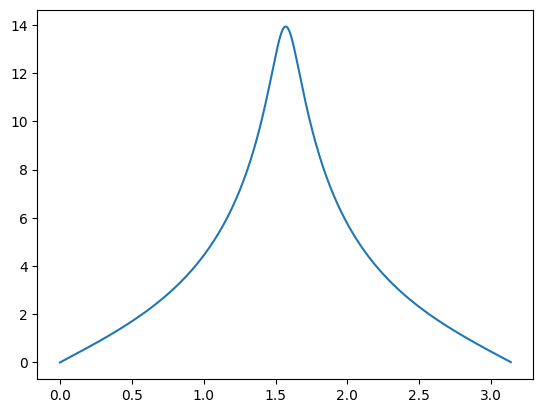

In [ ]:
# a
theta_values = np.linspace(1e-8, 6.28, 1000)


lista_sol=[]
for i in theta_values:
  solucion=A_phi(1.1,i)
  lista_sol.append(solucion)

plt.plot(theta_values, lista_sol)

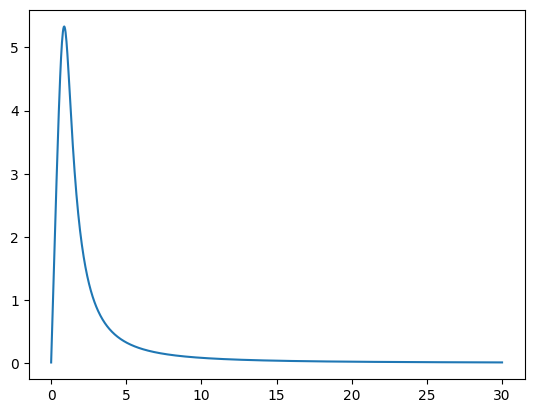

In [ ]:
#b
valores_r = np.linspace(0.001, 30-0.001, 1000)
theta2=pi/3
lista_sol1=[]
for r in valores_r:
  solucion=A_phi(r,theta2)
  lista_sol1.append(solucion)

plot(valores_r, lista_sol1)



Con base en la gráfica uno, obtenemos un potencial simétrico, el cual al existir una dependencia matemática entre $\phi$ y $\theta$ hace que el ángulo $\theta$ únicamente llegue hasta el valor correspondiente a $\pi$, esto debido a que el ángulo que hace el giro completo $2\pi$ es $\phi$ y no $\theta$. Entonces en el invervalo de [0,$\pi$/2] el potencial $ A_{\phi}(r,\theta)$ incrementa, pero en [$\pi$/2,$\pi$] el potencial decrece en la misma razón a la cual aumentó,como el barrido solo se produce en el íntervalo mencionado, este ciclo se repite en el cual el potencial aumenta inicialmente y después disminuye.


Mientras tanto para la segunda gráfica el potencial $ A_{\phi}(r,\theta)$ que cambia con respecto a $r$ nos indica que para valores entre (0,5) de la distancia el potencial alcanza un máximo siendo esto debido a que la partícula se encuentra más cerca del alambre conductor, a medida que la distancia va aumentando la interacción con el alambre es menor teniendo que el potencial disminuye, siendo así que para distancias muy grandes de r, el potencial finalmente es cero, dejandonos ver que no existe ya una interacción entre la partícula y el alambre.

## Ecuaciones Diferenciales Ordinarias

In [ ]:
#f la ec de la EDO
#xo la condicion inicial
#a,b los extremos del intervalo
#N las interaciones

def Euler(f, a, b, xo, N):
    h=(b-a)/N
    x=[xo]
    for i in range(N-1):
        x.append(x[i]+h*f(x[i],a+h*(i+1)))
    return x

def RK2(f, a, b, xo, N):
    h=(b-a)/N
    x=[xo]
    for i in range(N-1):
        k1=h*f(x[i],a+h*(i+1))
        k2=h*f(x[i]+0.5*k1,a+h*(i+1)+0.5*h)
        x.append(x[i]+k2)
    return x

def RK4(f, a, b, xo, N):
    h=(b-a)/N
    x=[xo]
    for i in range(N-1):
        k1=h*f(x[i],a+h*(i+1))
        k2=h*f(x[i]+0.5*k1,a+h*(i+1)+0.5*h)
        k3=h*f(x[i]+0.5*k2,a+h*(i+1)+0.5*h)
        k4=h*f(x[i]+k3,a+h*(i+1)+h)
        x.append(x[i]+(k1+2*k2+2*k3+k4)/6)
    return x

#Funcion que devuelve las soluciones de una EDO de segundo orden
#f es la ecuacion diferencial
#to y tf el intervalo de tiempo donde se bucan las soluciones
#xi la condicion inicial de la solucion
#vi la condicion inicial de la derivada
#h es el tamaño de paso
#metodo, es la tecnica a utilizar
def EDO2(f, to, tf, xi, vi, h, metodo):
    lista_t = arange(to,tf,h)
    lista_x = []
    lista_v = []
    r = array([xi,vi],float)
    for t in lista_t:
        lista_x.append(r[0])
        lista_v.append(r[1])
        metodo(f,r,t,h)
    return (lista_t, lista_x, lista_v)


#Para EDO de orden 2 acopladas
#f es la ecuacion diferencial
#to y tf el intervalo de tiempo donde se bucan las soluciones
#xi  la condicion inicial de la solucion de la primera funcion
#vxi la condicion inicial de la derivada de la primera funcion
#yi  la condicion inicial de la solucion de la segunda funcion
#vyi la condicion inicial de la derivada de la segunda funcion
#h es el tamaño de paso
#metodo, es la tecnica a utilizar, de la slistadas arriba

def EDO2_acoplada(f, to, tf, xi, yi, vxi, vyi, h, metodo):
    lista_t = arange(to,tf,h)
    lista_x  = []
    lista_y  = []
    lista_vx = []
    lista_vy = []
    r = array([xi,yi,vxi,vyi],float)
    for t in lista_t:
        lista_x.append(r[0])
        lista_y.append(r[1])
        lista_vx.append(r[2])
        lista_vy.append(r[3])
        metodo(f,r,t,h)
    return (lista_t, lista_x, lista_y, lista_vx, lista_vy)

def Euler2(f,r,t,h):
    r += h * f(r,t)

def RK22(f,r,t,h):
    k1 = f(r,t)
    k2 = f(r+ 0.5*h*k1, t+0.5*h)
    r += h * k2

def RK42(f,r,t,h):
    k1 = f(r,t)
    k2 = f(r + 0.5*h*k1, t + 0.5*h)
    k3 = f(r + 0.5*h*k2, t+ 0.5*h)
    k4 = f(r + h*k3, t + h)
    r += h/6 * (k1 + 2*k2 + 2*k3 + k4)

## Péndulo con resorte
Un péndulo unido a un resorte, presenta las siguientes ecuaciones diferenciales.

$$ \ddot{L} = \left ( L_{o} + L \right )\dot{\theta}^{2} - \frac{k}{m}L + 2g\cos\left ( \theta \right ).$$
$$ \ddot{\theta} = \frac{-2}{L_{o} + L}\left [g\sin\left ( \theta \right ) + \dot{L}\dot{\theta}  \right ].$$

**a)**
Ecuentra las soluciones para $L$ y $\theta$ para un intervalo de tiempo $t_{o} = 0\,s$, $t_{f} =35\,s$ con las siguientes condiciones iniciales

* $L(t=0) = 1m $

* $\dot{L}(t=0) = 0.3 \,m/s$

* $\theta(t=0) = 0.01 \,rad$

* $\dot{\theta}(t=0) = 2 \,rad/s$


Las constantes del sistema son $g = 9.8 \,m/s^{2}$, $L_{o}=1\,m$, $m= 0.1\,kg$, $k = 4 \,N/m$;

**b)** Encuentra y analiza el espacio fase de ambas ecuaciones.

**c)** Grafica la posición X vs la posición Y del péndulo.

**d)** Recrea el experimento si el péndulo con resorte está colgado sobre el techo de un súper elevador cuando este va de subida y la gravedad disminuye a la mitad; y cuando va descendiendo y la gravedad aumenta el doble.  ¿Hay consistencia de la informacion física del sistema? Explica con tus palabras el resultado y la represetacion grafica de ello.

Text(0.5, 1.0, "Soluciones de L y L' en función del tiempo")

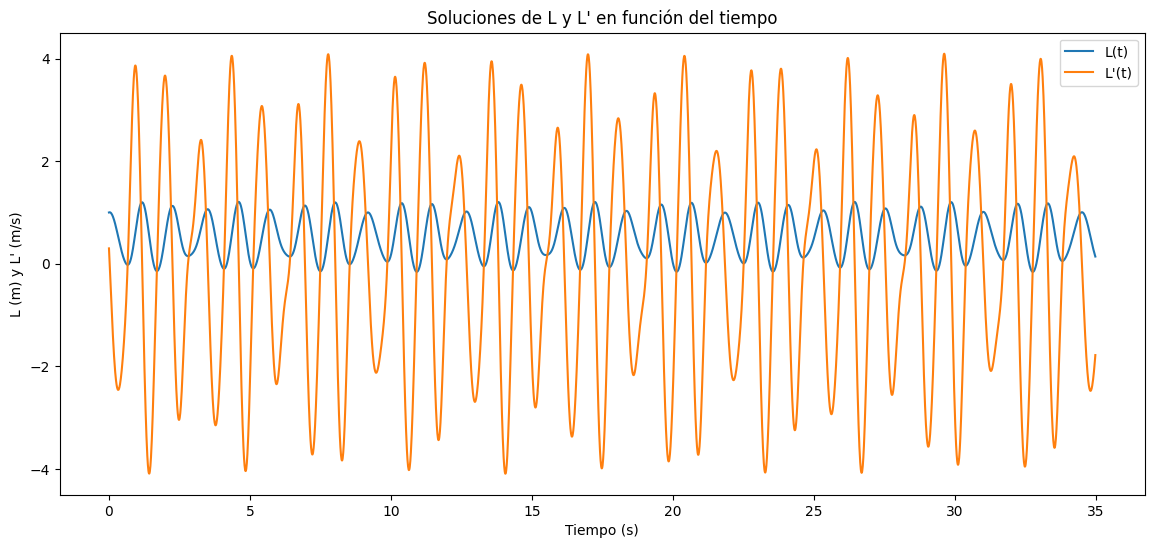

In [ ]:
#Inciso a)
g = 9.8
L_o = 1  # longitud natural del resorte en m
m = 0.1  # masa en kg
k = 4  # constante del resorte en N/m


# Definimos las ecuaciones diferenciales del sistema
def pendulo(r, t):

    L = r[0]   #variable de posicion1
    L_dot = r[1]   #variable de posicion2
    theta = r[2]   #variable de velocidad1
    theta_dot = r[3]   #variable de velocidad2

    L_ddot = (L_o + L) * theta_dot**2 - (k / m) * L + 2 * g * np.cos(theta)
    theta_ddot = (-2 / (L_o + L)) * (g * np.sin(theta) + L_dot * theta_dot)
    return np.array([L_dot, L_ddot, theta_dot, theta_ddot])


# Método de Runge-Kutta de cuarto orden
def RK42(f, r, t, h):
    k1 = f(r, t)
    k2 = f(r + 0.5*h*k1, t + 0.5*h)
    k3 = f(r + 0.5*h*k2, t + 0.5*h)
    k4 = f(r + h*k3, t + h)
    return r + h/6 * (k1 + 2*k2 + 2*k3 + k4)

# Condiciones iniciales
L_0 = 1  # L(t=0) en m
L_dot_0 = 0.3  # L'(t=0) en m/s
theta_0 = 0.01  # θ(t=0) en rad
theta_dot_0 = 2  # θ'(t=0) en rad/s
r0 = np.array([L_0, L_dot_0, theta_0, theta_dot_0])


t0 = 0  # tiempo inicial en s
tf = 35  # tiempo final en s
h = 0.01  # paso de tiempo
t_values = np.arange(t0, tf, h)

# Inicializar listas para almacenar las soluciones
L_valores = []
L_dot_valores = []
theta_valores = []
theta_dot_valores = []

# Estado inicial
r = r0

# Método de integración
for t in t_values:
    L_valores.append(r[0])
    L_dot_valores.append(r[1])
    theta_valores.append(r[2])
    theta_dot_valores.append(r[3])
    r = RK42(pendulo, r, t, h)

# Convertir a arrays
L_valores = np.array(L_valores)
L_dot_valores = np.array(L_dot_valores)
theta_valores = np.array(theta_valores)
theta_dot_valores = np.array(theta_dot_valores)

# Graficar las soluciones
plt.figure(figsize=(14, 6))


plt.plot(t_values, L_valores, label='L(t)')
plt.plot(t_values, L_dot_valores, label="L'(t)")
plt.xlabel('Tiempo (s)')
plt.ylabel('L (m) y L\' (m/s)')
plt.legend()
plt.title('Soluciones de L y L\' en función del tiempo')


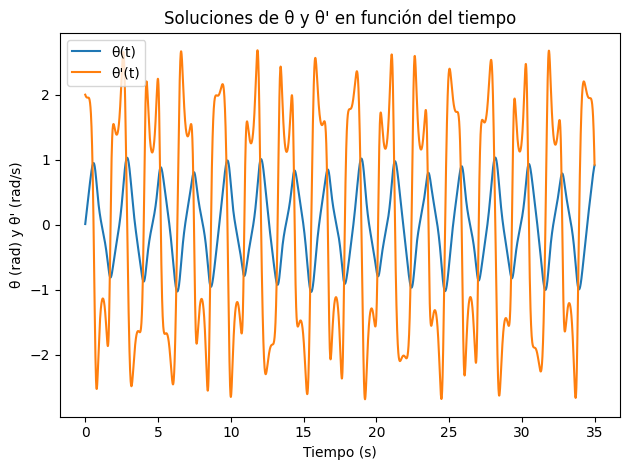

In [ ]:
#inciso a)
plt.plot(t_values, theta_valores, label='θ(t)')
plt.plot(t_values, theta_dot_valores, label="θ'(t)")
plt.xlabel('Tiempo (s)')
plt.ylabel('θ (rad) y θ\' (rad/s)')
plt.legend()
plt.title('Soluciones de θ y θ\' en función del tiempo')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Espacio fase')

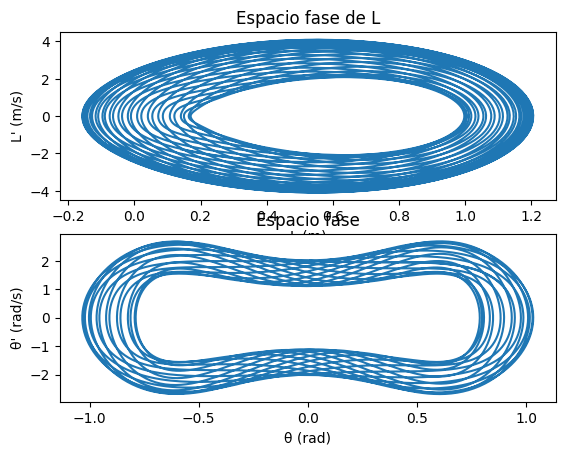

In [ ]:
# Inciso b) Graficar el espacio fase


plt.subplot(2, 1, 1)
plt.plot(L_valores, L_dot_valores)
plt.xlabel('L (m)')
plt.ylabel("L' (m/s)")
plt.title('Espacio fase de L')

plt.subplot(2, 1, 2)
plt.plot(theta_valores, theta_dot_valores)
plt.xlabel('θ (rad)')
plt.ylabel("θ' (rad/s)")
plt.title('Espacio fase')

En el caso del espacio fase de la longitud de la cuerda ocurre un fenómeno particular para cada punto sobre el eje x le corresponde exactamente dos velocidades de la cuerda, una positiva y otra negativa, estas depende meramente del marco de referencia a considerar y son soluciones a las ecuaciones diferenciales.

Análogamente el espacio fase del ángulo es similar, donde a cada valor de theta le corresponden 2 de su velocidad angular, de la misma forma como soluciones de las ecuaciones diferenciales. Además estas poseen un gran punto a favor, este es que existe una simetría con respecto al eje y y x, es decir tanto del lado derecho como del lado izquierdo de la gráfica ambas son análogas.

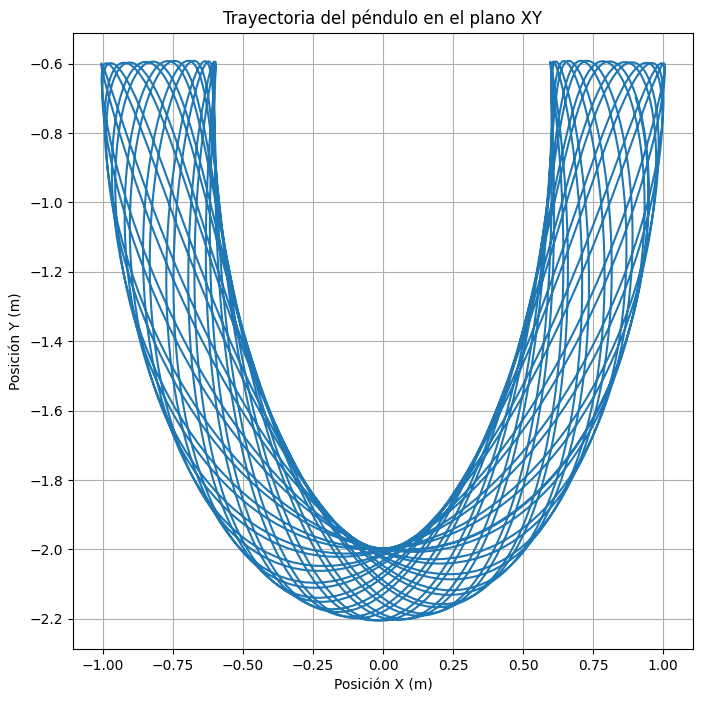

In [ ]:
#ultimos valores
X_values = (L_o + L_valores) * np.sin(theta_valores)
Y_values = -(L_o + L_valores) * np.cos(theta_valores)

# Graficar X vs Y
plt.figure(figsize=(8, 8))
plt.plot(X_values, Y_values)
plt.xlabel('Posición X (m)')
plt.ylabel('Posición Y (m)')
plt.title('Trayectoria del péndulo en el plano XY')
plt.grid(True)
plt.show()

## Presion Barometrica
La presión barométrica $p$ a una determinada altura $h$, está descrita por la siguiente ecuación diferencial.

$$ \frac{dP}{dh} = - \frac{mg}{T k_{B}}\,P.$$

Donde $m$ es  la masa de una molécula,  $g$ es el valor de la gravedad, $k_{B}$ la constante de Boltzmann, y $T$ el valor de la temperatura.

**a)**  Si la altura $h$ sobre el nivel del mar de la Ciudad de México es de 2250m, calcula la variación barométrica resolviendo la EDO con el método de tu preferencia.
Realiza en una gráfica $h$ vs $P$, donde la altura estará comprendida entre $h=0$ y $h_{max}$ Utiliza N=100 en el metodo númerico de tu preferencia.

Realiza en una gráfica $h$ vs $P$, donde la altura estará comprendida entre $h=0$ y $h_{max}$.


Repite el procedimientp si ahora la altura máxima es la del pico de Orizaba 5636m, utliza N=100.

Muestra ambas gráficas en una sola figura.

**Hint** usa escala logarítmica en ambos ejes con la instruccion `plt.xscale(´log´)`

Considera

* $P_{o} =1$
* $k_{B}=1$,
* $m=1$,
* $T = 25^{\circ}C$.

    

**b)** Interpreta y haz un análisis de la gráfica. Responde la razón de este planteamiento:

Si la altura de Ciudad de México es menor a la del pico de Orizaba, entonces la gráfica de la presión en el pico en algún momento tendria que contener la gráfica de la presion en la Ciudad de México. ¿Cuál es la razón del por qué ambas gráficas cuando se logra la altura de Ciudad de México tienen resultados diferentes?

**c)** Ahora queremos conocer como varía la presión en función de la temperatura si estamos en la altura de la Ciudad de México. Considera un intervalo de temperaturas $T = [-10^{\circ}, 40^{\circ}C]$ con 200 valores.  Para cada uno de ellos vuelve a calcular la presión final (el último valor de presión al resolver la EDO). De esta forma tendrás 200 valores de presión, uno por cada temperatura. Gráfica la temperatura vs la presión final y haz un análisis de la grafica.

**d)**  De acuerdo a la información de ambas gráficas, ¿cuál es la temperatura ideal para una persona que corre todos los días, si puede hacerlo a las 8 am donde $T= 7^{\circ}C$  ó a las 9 pm donde $25^{\circ}C$.
En la gráfica que te ayude a responder, localiza ambas temperaturas. Utiliza un marker especial para resaltarlas o un `plt.vline(posicion_ejeX, yo, yf)`.  


**NOTA** utiliza escala kelvin en las temperaturas para no tener problemas de indeterminaciones.

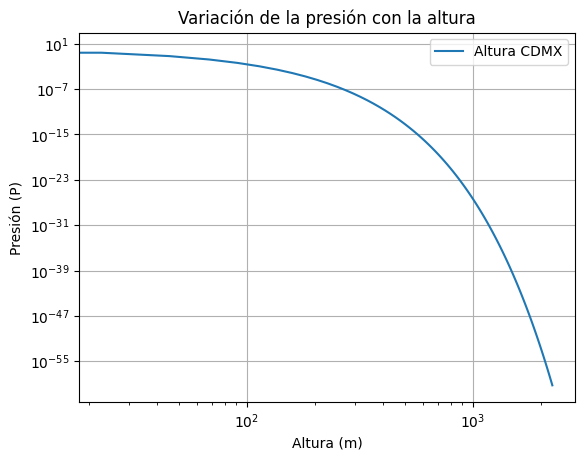

In [ ]:
#inciso a)

def dP_dh(P, T):
  m=1
  g=9.81
  T=295.15 #Convertir a grados kelvin
  k_B=1
  return - (m * g) / (T * k_B) * P

def Euler(f, a, b, xo, N):
  h=(b-a)/N
  x=[xo]
  for i in range(N-1):
    x.append(x[i]+h*f(x[i],a+h*(i+1)))
  return x

# Parámetros
h_max = 2250  # Altura máxima en metros
P0 = 1        # Presión inicial
N = 100      # Número de pasos

# Resolvemos la EDO usando el método de Euler
h_valores = np.linspace(0, h_max, N)
P_valores = Euler(dP_dh, 0, h_max, P0, N)

# Graficamos h vs P
plt.plot(h_valores , P_valores, label='Altura CDMX')
plt.xlabel('Altura (m)')
plt.xscale('log')
plt.ylabel('Presión (P)')
plt.yscale('log')
plt.title('Variación de la presión con la altura')
plt.legend()
plt.grid(True)
plt.show()




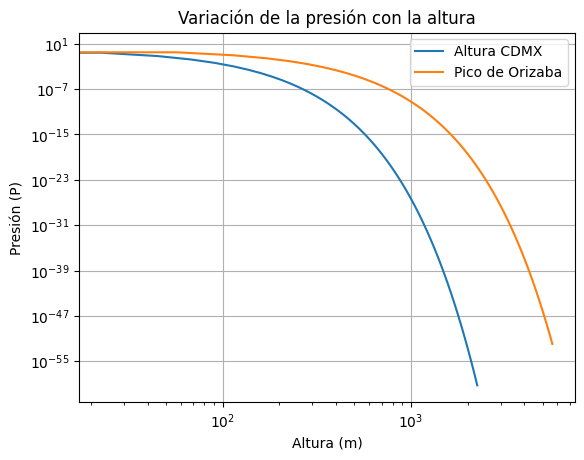

In [ ]:
# Parámetros
def dP_dh1(P, T):
  m=1
  g=9.81
  T=295.15 #Convertir a grados kelvin
  k_B=1
  return - (m * g) / (T * k_B) * P

def RK4(f, a, b, xo, N):
    h=(b-a)/N
    x=[xo]
    for i in range(N-1):
        k1=h*f(x[i],a+h*(i+1))
        k2=h*f(x[i]+0.5*k1,a+h*(i+1)+0.5*h)
        k3=h*f(x[i]+0.5*k2,a+h*(i+1)+0.5*h)
        k4=h*f(x[i]+k3,a+h*(i+1)+h)
        x.append(x[i]+(k1+2*k2+2*k3+k4)/6)
    return x


# Parámetros
h_max = 5636  # Altura máxima en metros
P0 = 1        # Presión inicial
N = 100      # Número de pasos

# Resolvemos la EDO usando el método de Euler
h_valores1 = np.linspace(0, h_max, N)
P_valores1 = RK4(dP_dh1, 0, h_max, P0, N)

# Graficamos h vs P
plt.plot(h_valores,P_valores, label='Altura CDMX')
plt.plot(h_valores1, P_valores1, label='Pico de Orizaba')
plt.xlabel('Altura (m)')
plt.xscale('log')
plt.ylabel('Presión (P)')
plt.yscale('log')
plt.title('Variación de la presión con la altura')
plt.legend()
plt.grid(True)
plt.show()

  **b)** Interpreta y haz un análisis de la gráfica. Responde la razón de este planteamiento:

Si la altura de Ciudad de México es menor a la del pico de Orizaba, entonces la gráfica de la presión en el pico en algún momento tendria que contener la gráfica de la presion en la Ciudad de México. ¿Cuál es la razón del por qué ambas gráficas cuando se logra la altura de Ciudad de México tienen resultados diferentes?

Esto se puede deber básicamente a que la solución de la ecuación diferencial hace que la presión disminuya con un valor de menos la exponencial de la altura multiplicada por alguna constante. Esto quiere decir que al tener el pico de Orizaba una mayor altura que la encontrada en Ciudad de México su gráfica contendrá valores mayores en comparación de la de Ciudad de México, la naturaleza de esta respuesta es meramente matemática.

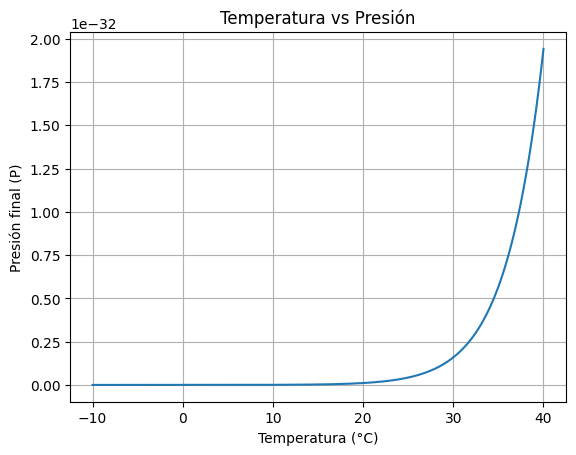

In [ ]:
#inciso c)
# Definimos nuevamente la función pero que dependa de la temperatura
def dP_dh(P, h, T):
    m = 1
    g = 9.81
    k_B = 1
    return - (m * g) / (T * k_B) * P

# Implementamos y modificamos nuevamente el método de Euler
def Euler(f, a, b, P0, N, T):
    h = (b - a) / N
    P = [P0]
    for i in range(N - 1):
        P.append(P[i] + h * f(P[i], a + h * (i + 1), T))
    return P

# Parámetros
h_max = 2250  # Altura máxima en metros
P0 = 1        # Presión inicial
N = 1000      # Número de pasos

# Rango de temperaturas de -10°C a 40°C
T_min = -10 + 273.15  # Convertir a Kelvin
T_max = 40 + 273.15   # Convertir a Kelvin
T_values = np.linspace(T_min, T_max, 200)

# Lista para almacenar la presión final para cada temperatura
P_final_values = []

# Calcular la presión final para cada temperatura en el rango
for T in T_values:
    P_values = Euler(dP_dh, 0, h_max, P0, N, T)
    P_final_values.append(P_values[-1])

# Graficar Temperatura vs Presión final
plt.plot(T_values- 273.15, P_final_values)  # Convertir de nuevo a Celsius para la gráfica
plt.xlabel('Temperatura (°C)')
plt.ylabel('Presión final (P)')
plt.title('Temperatura vs Presión')
plt.grid(True)

plt.show()


La gráfica nos ofrece una expresión de como cambia la presión final con respecto a la temperatura, observamos que el comportamiento de la presión con respecto a la temperatura es exponencial, teniendo así que a partir de los 20 grados celsius la presión final aumenta considerablemente. Todo esto tiene que ver por la naturaleza exponencial al momento de resolver la ecuación diferencial


**d)**  De acuerdo a la información de ambas gráficas, ¿cuál es la temperatura ideal para una persona que corre todos los días, si puede hacerlo a las 8 am donde $T= 7^{\circ}C$  ó a las 9 pm donde $25^{\circ}C$.
En la gráfica que te ayude a responder, localiza ambas temperaturas. Utiliza un marker especial para resaltarlas o un `plt.vline(posicion_ejeX, yo, yf)`.  


Al observar la gráfica pasada se tiene que la presión final a una temperatura de 20 grados es un poco mayor a la presión registrada en la temperatura de 7 grados, por tanto la mejor temperatura donde puede correr es a los 7 grados a las 8 am. Claramente bajo la suposición de que la temperatura se mantendrá igual todos los días.

## Por favor explica Leapfrog con tus propias palabras.

El método de Leap Frogg o mejor conocido como el método de la rana fue elaborado por Richard Feynmann en sus "Lectures On Physics". Este método emplea diversos métodos para la resolución de ecuaciones diferenciales tales como Runge Kutta de orden 2 así como el método de Euler.

Partiendo desde el comienzo, nuestro objetivo es construir primeramente un punto medio, este punto medio viene dado por el método de Euler como

$$x(t+\frac{h}{2})=x(t) +\frac {h}{2}f(x,t)$$. Donde $h$ es la base de una k-ésima parte del íntervalo cerrado [a,b].

Ahora para generar el siguiente paso, el paso entero, utilizamos las siguientes ecuaciones:
$$x(t+h)=x(t) +hf\left(x(t+ \frac{h}{2}),t+\frac{h}{2}\right)$$

Por último, se considera un punto extra ubicado en $\frac{3h}{2}$ y volvemos a aplicar Runge Kutta pero en esta ocasión considerando el paso medio que fue calculado por el método de Euler

$$x(t+\frac{3h}{2})=x(t+\frac{h}{2}) +hf(x(t+h),t+h)$$.

Estas últimas ecuaciones son las que son finalmente programadas. Finalmente, se puede decir que son llamadas "salto de rana" porque se van haciendo pasos de una unidad en los puntos medios y de una unidad completa también en las unidades enteras.
